## Imports

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf

## Data

### Spacy Embeddings

In [3]:
ekg_denoised = pd.read_pickle('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_spacy_v2.pkl')
ekg_denoised = ekg_denoised.sample(frac=1)


In [4]:
ekg_denoised.head()

,ICD9_CODE,spacy_embeddings
130,3,"[-0.13766885, 0.30783904, -0.13310608, -0.0156..."
7586,3,"[-0.023196926, 0.20862503, -0.17041668, -0.001..."
17514,0,"[-0.0032668572, 0.204065, -0.24022284, -0.1239..."
24103,0,"[0.10161864, 0.21258743, -0.11795857, -0.00331..."
1324,3,"[-0.13505583, 0.30865985, -0.1632402, 0.155783..."


In [5]:
ekg_denoised['spacy_embeddings'][4603].shape

(300,)

### Train/Dev/Test/Split

In [6]:
X = ekg_denoised['spacy_embeddings']
y = ekg_denoised['ICD9_CODE']

In [7]:
train_X, validate_X, test_X = np.split(X.sample(frac=1), 
                                       [int(.6*len(X)), 
                                        int(.8*len(X))])

train_y, validate_y, test_y = np.split(y.sample(frac=1), 
                                       [int(.6*len(y)), 
                                        int(.8*len(y))])

In [8]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [9]:
new_train_X = []
for i in train_X:
    new_train_X.append(list(i))
train_X = np.array(new_train_X)
    
new_validate_X = []
for i in validate_X:
    new_validate_X.append(list(i))
validate_X = np.array(new_validate_X)
    
new_test_X = []
for i in test_X:
    new_test_X.append(list(i))
test_X = np.array(new_test_X)

## Model

In [14]:
inputs = tf.keras.layers.Input(shape=(300,))
hidden_1_out = tf.keras.layers.Dense(200, activation='relu')(inputs)
dropout = tf.keras.layers.Dropout(0.5)(hidden_1_out)
hidden_2_out = tf.keras.layers.Dense(50, activation='relu')(dropout)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(hidden_2_out)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

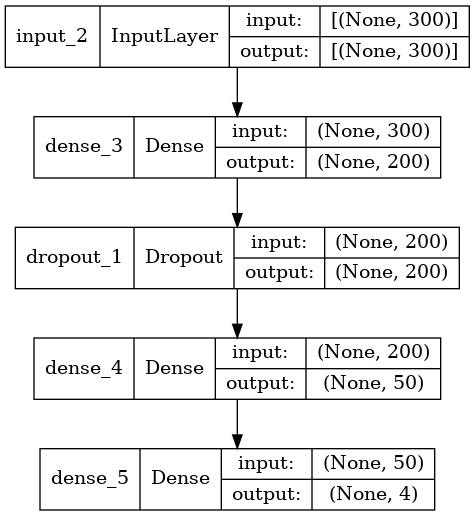

In [15]:
tf.keras.utils.plot_model(model_functional, "spacey_embeddings.png", show_shapes=True)


In [16]:
model_functional.fit(train_X, train_y, epochs=50, batch_size=512)


Epoch 1/50
80/80 [==============================] - 1s 5ms/step - loss: 1.3889 - accuracy: 0.2496
Epoch 2/50
80/80 [==============================] - 0s 4ms/step - loss: 1.3871 - accuracy: 0.2493
Epoch 3/50
80/80 [==============================] - 0s 4ms/step - loss: 1.3868 - accuracy: 0.2508
Epoch 4/50
80/80 [==============================] - 0s 5ms/step - loss: 1.3866 - accuracy: 0.2505
Epoch 5/50
80/80 [==============================] - 0s 5ms/step - loss: 1.3865 - accuracy: 0.2522
Epoch 6/50
80/80 [==============================] - 0s 4ms/step - loss: 1.3864 - accuracy: 0.2517
Epoch 7/50
80/80 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2521
Epoch 8/50
80/80 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2551
Epoch 9/50
80/80 [==============================] - 0s 4ms/step - loss: 1.3861 - accuracy: 0.2512
Epoch 10/50
80/80 [==============================] - 0s 4ms/step - loss: 1.3862 - accuracy: 0.2515
Epoch 11/50
80/80 [

In [17]:
model_functional.evaluate(test_X, test_y)

427/427 [==============================] - 1s 1ms/step - loss: 1.3934 - accuracy: 0.2537


[1.3934035301208496, 0.2537401020526886]

No learning! Random chance would label 25% of values accurately. Averaging during the embedding stage is likely causing it to lose information